In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
data=pd.read_csv("C:/Users/User/OneDrive/Documents/Predicting_Term-Deposit_Subscription_in_a_Banking_Marketing_Campaign/bank_expanded.csv")
type(data)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
#checking unique values of every column of uncleaned dataset
print(data.iloc[:,1].unique())
print(data.iloc[:,2].unique())
print(data.iloc[:,3].unique())
print(data.iloc[:,4].unique())
print(data.iloc[:,5].unique())
print(data.iloc[:,6].unique())
print(data.iloc[:,7].unique())
print(data.iloc[:,8].unique())
print(data.iloc[:,9].unique())
print(data.iloc[:,10].unique())
print(data.iloc[:,11].unique())
print(data.iloc[:,12].unique())
print(data.iloc[:,13].unique())
print(data.iloc[:,14].unique())
print(data.iloc[:,15].unique())
print(data.iloc[:,16].unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['married' 'single' 'divorced']
['secondary' 'tertiary' 'primary' 'unknown']
['no' 'yes']
[2343   45 1270 ... 1594 2593 -134]
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[1042 1467 1389 ... 1504  818 1812]
[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
[ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  90
 196 246 238 203 268 189 267  92   9  88  85 210 257 261 270 106 199 112
  41 294 231 239 302 135 307 222 138 323 141 320 264 316 315 256 146 328
  74 148 327 341 145 266 234 345 318 325 274 343 260 3

***Data Cleaning***

In [4]:
#we are gonna use age, job, marital, education, default, balance, housing, loan, campaign as features
#the target is the column 'deposit'

#removing null values from the dataset
data_cleaned1=data.dropna(axis=0,how='any')
data_cleaned1.shape

#removing unknown values from the dataset
data_cleaned2=data_cleaned1[(data_cleaned1['job']!='unknown') & (data_cleaned1['education']!='unknown')]
data_cleaned2.shape

#removing the unnecessary columns and taking the features and target into seperate datasets
selected_columns=[0,1,2,3,4,5,6,7,12,16]
data_cleaned_final=data_cleaned2.iloc[:,selected_columns]
print(data_cleaned_final.shape)
data_cleaned_final.head()

(39054, 10)


,age,job,marital,education,default,balance,housing,loan,campaign,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1,yes
1,56,admin.,married,secondary,no,45,no,no,1,yes
2,41,technician,married,secondary,no,1270,yes,no,1,yes
3,55,services,married,secondary,no,2476,yes,no,1,yes
4,54,admin.,married,tertiary,no,184,no,no,2,yes


***Plotting***

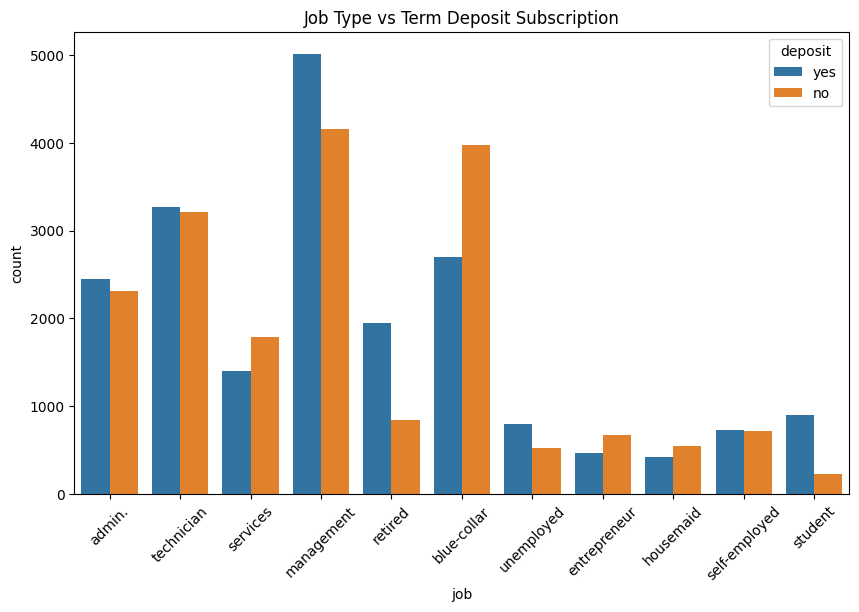

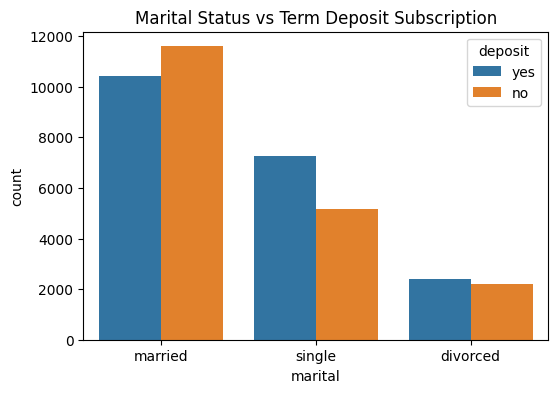

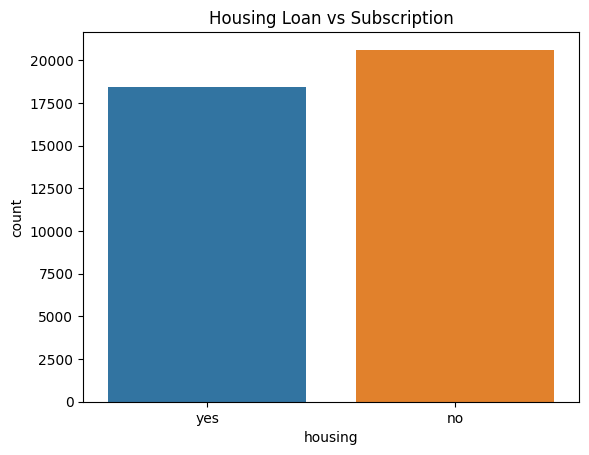

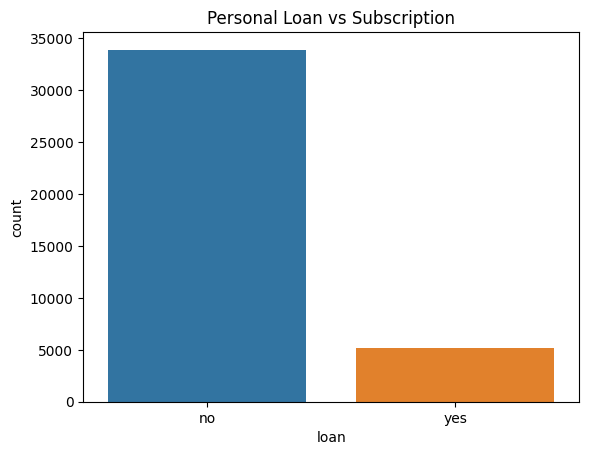

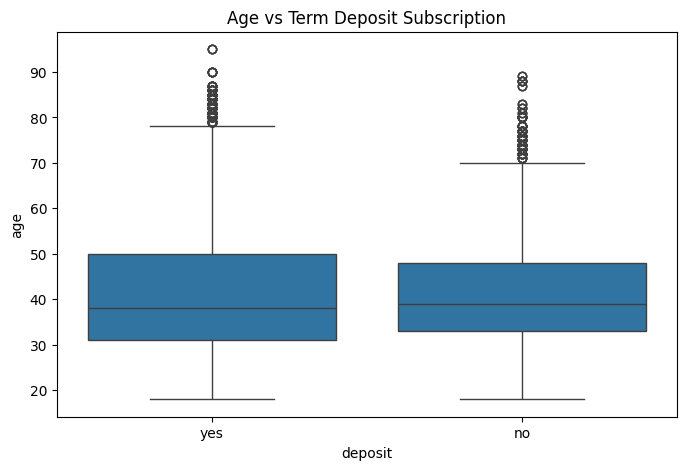

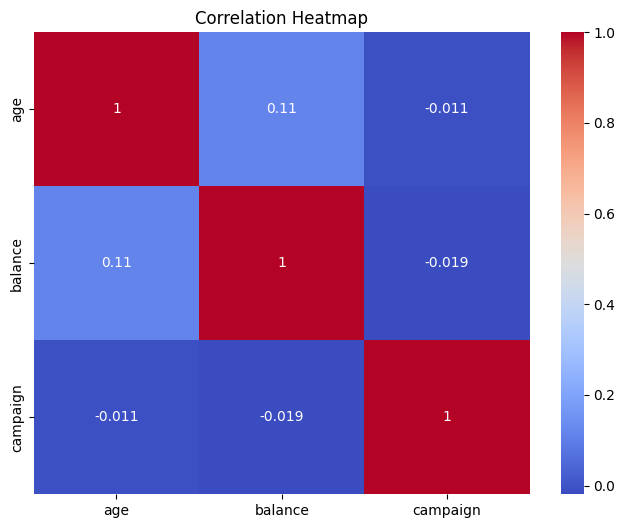

In [5]:
#plotting job vs term deposit subscription
plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='deposit', data=data_cleaned_final)
plt.xticks(rotation=45)
plt.title("Job Type vs Term Deposit Subscription")
plt.show()

#plotting marital vs term deposit subscription
plt.figure(figsize=(6,4))
sns.countplot(x='marital', hue='deposit', data=data_cleaned_final)
plt.title("Marital Status vs Term Deposit Subscription")
plt.show()

#plotting housing vs term deposit subscription
sns.countplot(x='housing', hue='housing', data=data_cleaned_final)
plt.title("Housing Loan vs Subscription")
plt.show()

#plotting loan vs term deposit subscription
sns.countplot(x='loan', hue='loan', data=data_cleaned_final)
plt.title("Personal Loan vs Subscription")
plt.show()

#plotting age vs term deposit subscription
plt.figure(figsize=(8,5))
sns.boxplot(x='deposit', y='age', data=data_cleaned_final)
plt.title("Age vs Term Deposit Subscription")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(data_cleaned_final[['age','balance','campaign']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



***Setting features and target***

In [6]:
X=data_cleaned_final.iloc[:,0:9]
print(X.head())
y=data_cleaned_final.iloc[:,9]
print(y.head())
y=(pd.DataFrame(y.reset_index(drop=True)))  #resetting the indices of the pandas series 'y' and saving it as a pandas dataframe
y.head()

   age         job  marital  education default  balance housing loan  campaign
0   59      admin.  married  secondary      no     2343     yes   no         1
1   56      admin.  married  secondary      no       45      no   no         1
2   41  technician  married  secondary      no     1270     yes   no         1
3   55    services  married  secondary      no     2476     yes   no         1
4   54      admin.  married   tertiary      no      184      no   no         2
0    yes
1    yes
2    yes
3    yes
4    yes
Name: deposit, dtype: object


,deposit
0,yes
1,yes
2,yes
3,yes
4,yes


***Preprocessing***

In [ ]:

#scaling the values of numeric variables
std_scaler=StandardScaler().set_output(transform='pandas')
rb_scaler=RobustScaler(quantile_range=(0.25,0.75)).set_output(transform='pandas')

scaled_data_age=std_scaler.fit_transform(X[['age']])
scaled_data_age.head()
# X['balance']=np.log(X['balance'])  #making log_transformation here and took log1p in case there was any zero values
scaled_data_balance=rb_scaler.fit_transform(X[['balance']])
scaled_data_balance.head()
scaled_data_campaign=std_scaler.fit_transform(X[['campaign']])
scaled_data_campaign.head()

X[['age']]=scaled_data_age
X[['balance']]=scaled_data_balance
X[['campaign']]=scaled_data_campaign
X.head()

,age,job,marital,education,default,balance,housing,loan,campaign
0,1.510025,admin.,married,secondary,no,5.540261,yes,no,-0.569800
1,1.257365,admin.,married,secondary,no,-1.588249,no,no,-0.569800
2,-0.005937,technician,married,secondary,no,2.211761,yes,no,-0.569800
3,1.173145,services,married,secondary,no,5.952833,yes,no,-0.569800
4,1.088925,admin.,married,tertiary,no,-1.157065,no,no,-0.181441


In [8]:
#encoding the categorical variables
ohe=OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ode=OrdinalEncoder().set_output(transform='pandas')

default_values=X.iloc[:,4].unique()
print(default_values)

marital_encoded_values=ohe.fit_transform(X[['marital']])
job_encoded_values=ohe.fit_transform(X[['job']])
education_encoded_values=ohe.fit_transform(X[['education']])
default_encoded_values=ode.fit_transform(X[['default']],[['no'],['yes']])
housing_encoded_values=ode.fit_transform(X[['housing']],[['no'],['yes']])
loan_encoded_values=ode.fit_transform(X[['loan']],[['no'],['yes']])

X=pd.concat([X, marital_encoded_values, job_encoded_values, education_encoded_values, default_encoded_values, housing_encoded_values, loan_encoded_values],axis=1).drop(['job', 'marital', 'education', 'default', 'housing', 'loan'],axis=1)
X.head()

['no' 'yes']


,age,balance,campaign,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary
0,1.510025,5.540261,-0.569800,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.257365,-1.588249,-0.569800,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.005937,2.211761,-0.569800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.173145,5.952833,-0.569800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.088925,-1.157065,-0.181441,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
#encoding the target variable
y_encoded_values=ode.fit_transform(y[['deposit']],[['no'],['yes']])
y=y_encoded_values
y.head()

,deposit
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


***Multicollinearity Checking***

In [10]:
#through variation inflation factor
X_vif_check = add_constant(X[['age','balance','campaign']]) 
print(X_vif_check.head())
vif_data = pd.DataFrame() 
vif_data["Feature"] = X_vif_check.columns 
vif_data["VIF"] = [variance_inflation_factor(X_vif_check.values, i) for i in range(X_vif_check.shape[1])]
print(vif_data)

   const       age   balance  campaign
0    1.0  1.510025  5.540261 -0.569800
1    1.0  1.257365 -1.588249 -0.569800
2    1.0 -0.005937  2.211761 -0.569800
3    1.0  1.173145  5.952833 -0.569800
4    1.0  1.088925 -1.157065 -0.181441
    Feature       VIF
0     const  1.093101
1       age  1.013187
2   balance  1.013444
3  campaign  1.000453


***Model training***

***1)Logistic regression***

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


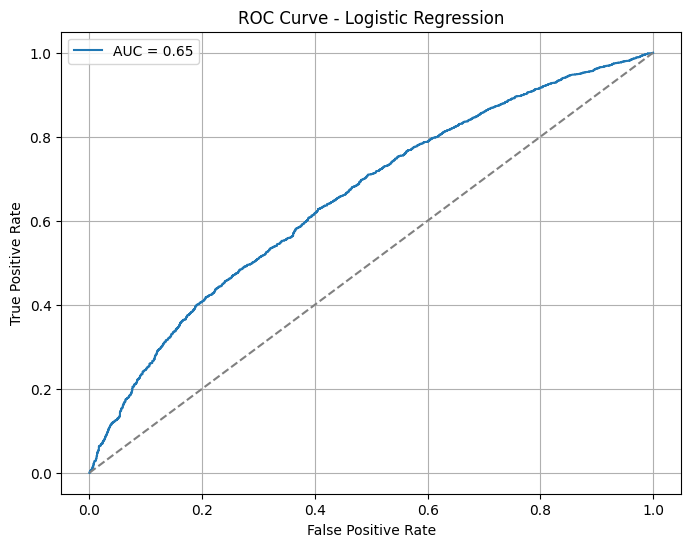

In [26]:
lr=LogisticRegression(class_weight='balanced')
X_train_lr,X_test_lr,y_train_lr,y_test_lr=train_test_split(X,y,test_size=0.2,random_state=42)
sm=SMOTE(random_state=42)
X_train_lr_resampled, y_train_lr_resampled=sm.fit_resample(X_train_lr,y_train_lr)
lr.fit(X_train_lr_resampled,y_train_lr_resampled)
y_pred_lr=lr.predict(X_test_lr)
y_probs_lr=lr.predict_proba(X_test_lr)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_lr, y_probs_lr)
auc_score_lr = roc_auc_score(y_test_lr, y_probs_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {auc_score_lr:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()


***2)kNN Classifier***

In [15]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

# hyperparameter tuning
param_dist_knn = {
    'n_neighbors': list(range(1, 20)),  # Number of neighbors to try from 1 to 30
    'weights': ['uniform', 'distance'],  # Uniform or weighted by distance
    'metric': ['euclidean', 'manhattan']  # Distance metrics to try
}
random_search_knn = RandomizedSearchCV(estimator=knn,
                                       param_distributions=param_dist_knn,
                                       n_iter=20,           # no. of different combinations of hyperparameters
                                       cv=5,                # 5-fold cross-validation
                                       scoring='f1',     # Metric to optimize
                                       n_jobs=-1,           # Use all CPUs
                                       random_state=42
                                       )
random_search_knn.fit(X_train_knn,y_train_knn)

c:\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,estimator,KNeighborsClassifier()
,param_distributions,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [1, 2, ...], 'weights': ['uniform', 'distance']}"
,n_iter,20
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


Best parameters for knn classifier:  {'weights': 'distance', 'n_neighbors': 14, 'metric': 'manhattan'}


c:\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


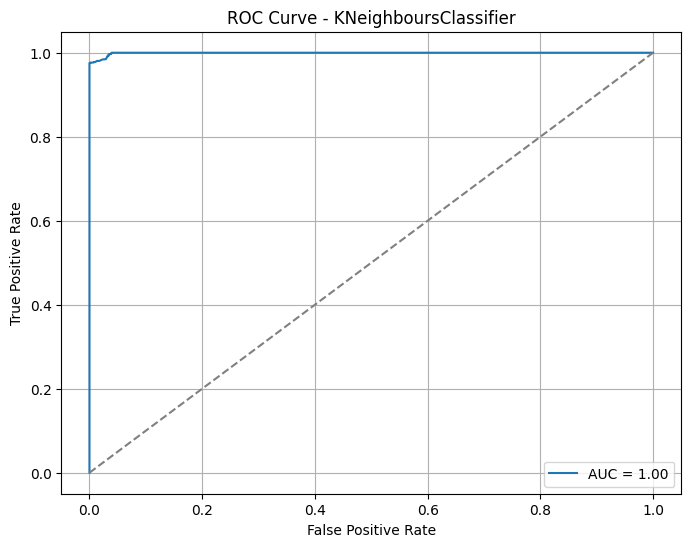

In [ ]:
print("Best parameters for knn classifier: ",random_search_knn.best_params_)

best_knn=random_search_knn.best_estimator_

best_knn.fit(X_train_knn, y_train_knn)
y_pred_best_knn = best_knn.predict(X_test_knn)
y_probs_best_knn = best_knn.predict_proba(X_test_knn)[:, 1]
fpr_best_knn, tpr_best_knn, thresholds_best_knn = roc_curve(y_test_knn, y_probs_best_knn)
auc_score_best_knn = roc_auc_score(y_test_knn, y_probs_best_knn)
print("AUC_score after using KNeighborsClassifier model: ",auc_score_best_knn)
f1_score_best_knn=f1_score(y_test_knn,y_pred_best_knn)
print("f1_score after using DecisionTree model:",f1_score_best_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_knn, tpr_best_knn, label=f"AUC = {auc_score_best_knn:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNeighboursClassifier")
plt.legend()
plt.grid()
plt.show()


***3)Decision Tree***

In [19]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

param_dist_dt = {
    'max_depth': list(range(1, 20)),            # Depth of the tree
    'min_samples_split': list(range(2, 20)),   # Minimum samples required to split an internal node
    'min_samples_leaf': list(range(2, 20)),    # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],       # Split quality criterion
}
random_search_dt = RandomizedSearchCV(estimator=dt,
                                       param_distributions=param_dist_dt,
                                       n_iter=20,           # no. of different combinations of hyperparameters
                                       cv=5,                # 5-fold cross-validation
                                       scoring='f1',     # Metric to optimize
                                       n_jobs=-1,           # Use all CPUs
                                       random_state=42
                                       )
random_search_dt.fit(X_train_dt,y_train_dt)

,estimator,DecisionTreeC...ndom_state=42)
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...], 'min_samples_leaf': [2, 3, ...], 'min_samples_split': [2, 3, ...]}"
,n_iter,20
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


Best parameters for dt classifier:  {'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 17, 'criterion': 'gini'}


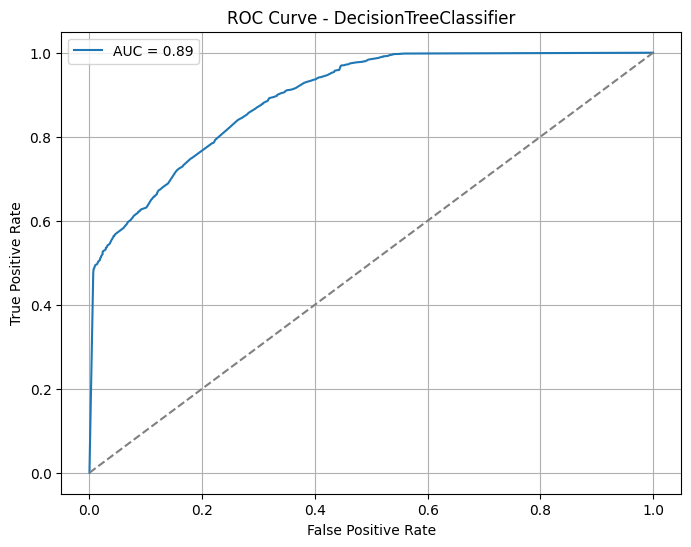

In [ ]:
print("Best parameters for dt classifier: ", random_search_dt.best_params_)

best_dt = random_search_dt.best_estimator_

best_dt.fit(X_train_dt, y_train_dt)
y_pred_best_dt = best_dt.predict(X_test_dt)
y_probs_best_dt = best_dt.predict_proba(X_test_dt)[:, 1]
fpr_best_dt, tpr_best_dt, thresholds_best_dt = roc_curve(y_test_dt, y_probs_best_dt)
auc_score_best_dt = roc_auc_score(y_test_dt, y_probs_best_dt)
print("AUC_score after using DecisionTree model: ",auc_score_best_dt)
f1_score_best_dt=f1_score(y_test_dt,y_pred_best_dt)
print("f1_score after using DecisionTree model:",f1_score_best_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_dt, tpr_best_dt, label=f"AUC = {auc_score_best_dt:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - DecisionTreeClassifier")
plt.legend()
plt.grid()
plt.show()


***4)Naive Bayes***

In [22]:
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X, y, test_size=0.2, random_state=42)

gnb=GaussianNB()

param_dist_gnb = {
    'var_smoothing': np.random.uniform(low=1e-12, high=1e-7, size=5)
}

random_search_gnb = RandomizedSearchCV(estimator=gnb,
                                       param_distributions=param_dist_gnb,
                                       n_iter=20,           # no. of different combinations of hyperparameters
                                       cv=5,                # 5-fold cross-validation
                                       scoring='f1',        # Metric to optimize
                                       n_jobs=-1,           # Use all CPUs
                                       random_state=42
                                       )
random_search_gnb.fit(X_train_gnb,y_train_gnb)

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,estimator,GaussianNB()
,param_distributions,{'var_smoothing': array([3.8924...98559483e-08])}
,n_iter,20
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


Best parameters for gnb classifier:  {'var_smoothing': np.float64(6.925988002077342e-08)}


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


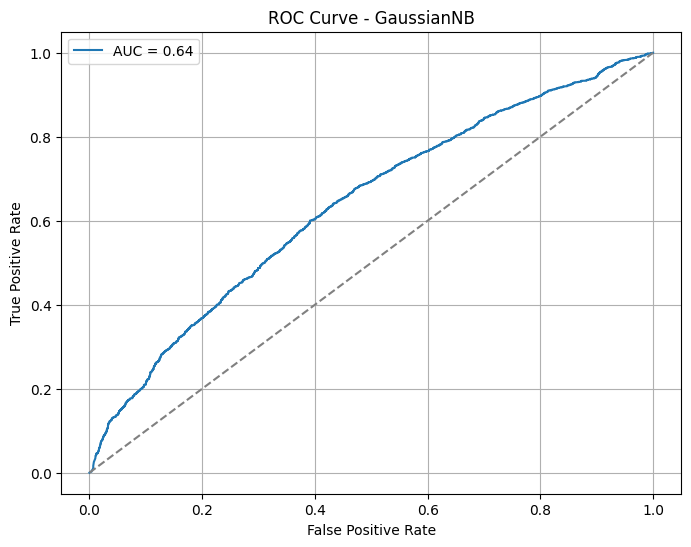

In [ ]:
print("Best parameters for gnb classifier: ", random_search_gnb.best_params_)

best_gnb = random_search_gnb.best_estimator_

best_gnb.fit(X_train_gnb, y_train_gnb)
y_pred_best_gnb = best_gnb.predict(X_test_gnb)
y_probs_best_gnb = best_gnb.predict_proba(X_test_gnb)[:, 1]
fpr_best_gnb, tpr_best_gnb, thresholds_best_gnb = roc_curve(y_test_gnb, y_probs_best_gnb)
auc_score_best_gnb = roc_auc_score(y_test_gnb, y_probs_best_gnb)
print("AUC_score after using GaussianNB model: ",auc_score_best_gnb)
f1_score_best_gnb=f1_score(y_test_gnb,y_pred_best_gnb)
print("f1_score after using GaussianNB model:",f1_score_best_gnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_gnb, tpr_best_gnb, label=f"AUC = {auc_score_best_gnb:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GaussianNB")
plt.legend()
plt.grid()
plt.show()
